In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
# Read data
employee_satisfaction_data = pd.read_csv('data.csv')
employee_satisfaction_data = employee_satisfaction_data.drop('Unnamed: 0', axis = 1)
employee_satisfaction_data = employee_satisfaction_data.drop('location', axis = 1)
employee_satisfaction_data = employee_satisfaction_data.drop('emp_id', axis = 1)

In [3]:
vectorizer = CountVectorizer()
#Transform department data
deptColumnData = employee_satisfaction_data['Dept']
deptColumnData_encoded = vectorizer.fit_transform(deptColumnData)
deptColumnData_encoded = deptColumnData_encoded.toarray()
deptColumnData_encoded = [row[0] for row in deptColumnData_encoded]
#Transfortm location
recruitmentData = employee_satisfaction_data['recruitment_type']
recruitmentData_encoded = vectorizer.fit_transform(recruitmentData)
recruitmentData_encoded = recruitmentData_encoded.toarray()
recruitmentData_encoded = [row[0] for row in recruitmentData_encoded]
#Transfortm education
educationData = employee_satisfaction_data['education']
educationData_encoded = vectorizer.fit_transform(educationData)
educationData_encoded = educationData_encoded.toarray()
educationData_encoded = [row[0] for row in educationData_encoded]

employee_satisfaction_data = employee_satisfaction_data.assign(Dept = deptColumnData_encoded)
employee_satisfaction_data = employee_satisfaction_data.assign(recruitment_type = recruitmentData_encoded)
employee_satisfaction_data = employee_satisfaction_data.assign(education = educationData_encoded)

In [4]:
# Split the data into training and test sets
scaler = StandardScaler()
scaler.fit(employee_satisfaction_data.drop('Dept', axis=1))
scaled_features = pd.DataFrame(scaler.transform(employee_satisfaction_data.drop('Dept', axis=1)),columns=employee_satisfaction_data.columns[:-1])
scaled_features.head()

X_train, X_test, Y_train, Y_test = train_test_split(scaled_features, employee_satisfaction_data['Dept'], random_state=0)

In [5]:
model = Sequential()
model.add(Dense(20, input_dim=10, activation='relu'))
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model.fit(X_train, Y_train, epochs=30)

Epoch 1/30
12/12 [==============================] - 1s 1ms/step - loss: 0.5708 - accuracy: 0.7733
Epoch 2/30
12/12 [==============================] - 0s 1ms/step - loss: 0.5529 - accuracy: 0.7707
Epoch 3/30
12/12 [==============================] - 0s 1ms/step - loss: 0.5393 - accuracy: 0.7787
Epoch 4/30
12/12 [==============================] - 0s 1ms/step - loss: 0.5336 - accuracy: 0.7787
Epoch 5/30
12/12 [==============================] - 0s 1ms/step - loss: 0.5265 - accuracy: 0.7787
Epoch 6/30
12/12 [==============================] - 0s 1ms/step - loss: 0.5220 - accuracy: 0.7787
Epoch 7/30
12/12 [==============================] - 0s 1ms/step - loss: 0.5179 - accuracy: 0.7787
Epoch 8/30
12/12 [==============================] - 0s 1ms/step - loss: 0.5136 - accuracy: 0.7787
Epoch 9/30
12/12 [==============================] - 0s 1ms/step - loss: 0.5101 - accuracy: 0.7787
Epoch 10/30
12/12 [==============================] - 0s 1ms/step - loss: 0.5070 - accuracy: 0.7787
Epoch 11/30
12/12 [

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(Y_test, Y_pred), '\n', classification_report(Y_test, Y_pred))

4/4 [==============================] - 0s 1ms/step
[[102   0]
 [ 23   0]] 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       102
           1       0.00      0.00      0.00        23

    accuracy                           0.82       125
   macro avg       0.41      0.50      0.45       125
weighted avg       0.67      0.82      0.73       125



c:\users\vladislavzelenin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vladislavzelenin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vladislavzelenin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [8]:
#2
import matplotlib.pyplot as plt
import numpy as np

generator = ImageDataGenerator()
batches   = generator.flow_from_directory('train')
indices = batches.class_indices
labels  = list(indices.keys())
labels

Found 613 images belonging to 4 classes.


['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

In [9]:
valid_datagen = ImageDataGenerator(rescale=1 / 255)
test_datagen = ImageDataGenerator(rescale=1 / 255)
train_datagen = ImageDataGenerator(rescale=1 / 255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=30,
                                   fill_mode='nearest')

In [10]:
test_gemerator = test_datagen.flow_from_directory('test',
                                                  target_size=(224, 224),
                                                  color_mode='rgb',
                                                  class_mode='sparse',
                                                  batch_size=256)
val_generator = valid_datagen.flow_from_directory('valid',
                                                  target_size=(224, 224),
                                                  color_mode='rgb',
                                                  class_mode='sparse',
                                                  batch_size=256)
train_generator = train_datagen.flow_from_directory('train',
                                                    target_size=(224, 224),
                                                    color_mode='rgb',
                                                    class_mode='sparse',
                                                    batch_size=256)

Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 613 images belonging to 4 classes.


In [11]:
# Model Initialization
from keras.models import Sequential
from keras.applications import ResNet101V2
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation

convlayer = ResNet101V2(input_shape=(224, 224, 3),
                        weights='imagenet',
                        include_top=False)
for layer in convlayer.layers:
    layer.trainable = False
model = Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 batch_normalization (BatchN  (None, 100352)           401408    
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 2048)              205522944 
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                      

In [12]:
import tensorflow
from keras.callbacks import EarlyStopping, ModelCheckpoint

opt = tensorflow.keras.optimizers.Adam(lr=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=opt)

filepath = './best_weights.hdf5'

earlystopping = EarlyStopping(monitor='val_accuracy',
                              mode='max',
                              patience=10,
                              verbose=1)

checkpoint = ModelCheckpoint(filepath,
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=1)

callback_list = [earlystopping, checkpoint]
model_history = model.fit(train_generator,
                          validation_data=val_generator,
                          epochs=5,
                          callbacks=callback_list,
                          verbose=1)

Epoch 1/5
3/3 [==============================] - ETA: 0s - loss: 4.3514 - accuracy: 0.2529 
Epoch 1: val_accuracy improved from -inf to 0.19444, saving model to .\best_weights.hdf5
3/3 [==============================] - 67s 25s/step - loss: 4.3514 - accuracy: 0.2529 - val_loss: 24.8874 - val_accuracy: 0.1944
Epoch 2/5
3/3 [==============================] - ETA: 0s - loss: 1.6316 - accuracy: 0.6313 
Epoch 2: val_accuracy improved from 0.19444 to 0.22222, saving model to .\best_weights.hdf5
3/3 [==============================] - 56s 23s/step - loss: 1.6316 - accuracy: 0.6313 - val_loss: 55.0861 - val_accuracy: 0.2222
Epoch 3/5
3/3 [==============================] - ETA: 0s - loss: 1.0717 - accuracy: 0.6949
Epoch 3: val_accuracy did not improve from 0.22222
3/3 [==============================] - 53s 16s/step - loss: 1.0717 - accuracy: 0.6949 - val_loss: 59.2868 - val_accuracy: 0.2083
Epoch 4/5
3/3 [==============================] - ETA: 0s - loss: 0.7447 - accuracy: 0.7488
Epoch 4: val_ac

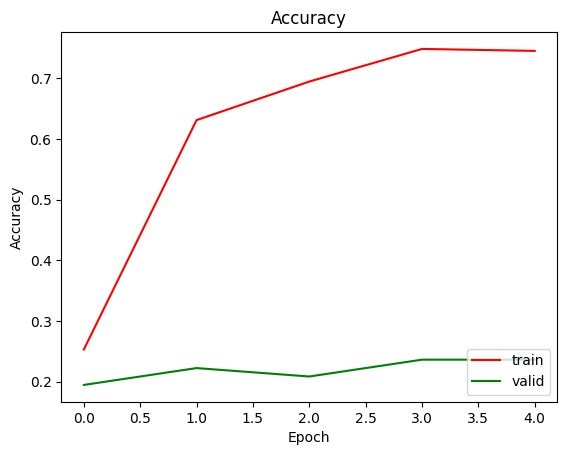

In [13]:
plt.plot(model_history.history['accuracy'], c='red')
plt.plot(model_history.history['val_accuracy'], c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='lower right')

In [14]:
sms_spam_collection = pd.read_csv('spam.csv', sep='\t', header=None, names=['Label', 'SMS'], encoding='windows-1252')

sms_spam_collection['SMS'] = sms_spam_collection['SMS'].str.replace('\W', ' ')
# To lower case
sms_spam_collection['SMS'] = sms_spam_collection['SMS'].str.lower()

sms_spam_collection['SMS'] = sms_spam_collection['SMS'].str.split()

In [27]:
# Split the dataset into train and test sets
# Convert the labels to numerical values
x = sms_spam_collection['SMS'].values
y = sms_spam_collection['Label'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [29]:
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer

dictionary_length = 1000
input_length = 100

tokenizer = Tokenizer(num_words=dictionary_length)
tokenizer.fit_on_texts(sms_spam_collection.SMS.values)
post_seq = tokenizer.texts_to_sequences(sms_spam_collection.SMS.values)
post_seq_padded = pad_sequences(post_seq, maxlen=input_length)

In [31]:
from sklearn.utils import shuffle

x_original = post_seq_padded
x_original = np.array(x_original)
y_original = sms_spam_collection['SMS'].values
y_original = 1 * (y_original == 'spam')
y_original = np.array(y_original)
x, y = shuffle(x_original, y_original, random_state=23)

In [32]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=25)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=25)

In [33]:
from keras.layers import Embedding, Dense, Bidirectional, SimpleRNN

model = Sequential()
model.add(Embedding(dictionary_length, 2, input_length=input_length))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Bidirectional(SimpleRNN(16, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(16, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(16, return_sequences=False)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 2)            2000      
                                                                 
 dense_6 (Dense)             (None, 100, 32)           96        
                                                                 
 dense_7 (Dense)             (None, 100, 32)           1056      
                                                                 
 bidirectional (Bidirectiona  (None, 100, 32)          1568      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 32)          1568      
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)              

In [34]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
history = model.fit(x=x_train, y=y_train, batch_size=256, verbose=1, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
13/13 [==============================] - 7s 148ms/step - loss: 0.3204 - accuracy: 0.9628 - val_loss: 0.1026 - val_accuracy: 1.0000
Epoch 2/5
13/13 [==============================] - 1s 84ms/step - loss: 0.0550 - accuracy: 1.0000 - val_loss: 0.0250 - val_accuracy: 1.0000
Epoch 3/5
13/13 [==============================] - 1s 83ms/step - loss: 0.0180 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 4/5
13/13 [==============================] - 1s 83ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 5/5
13/13 [==============================] - 1s 86ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000


In [36]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

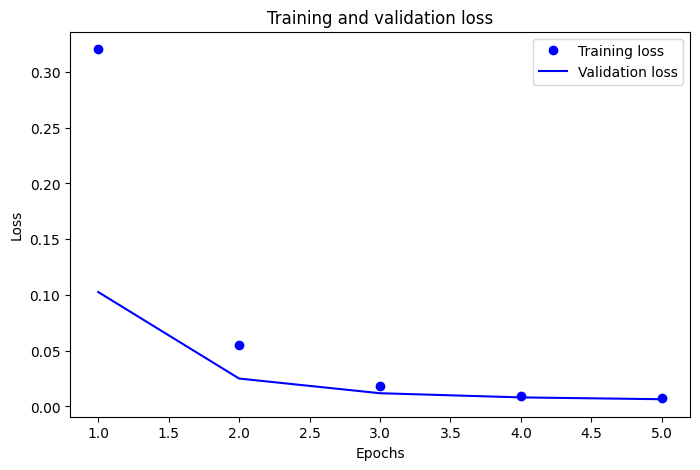

In [37]:
plt.figure(figsize=(8, 5))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

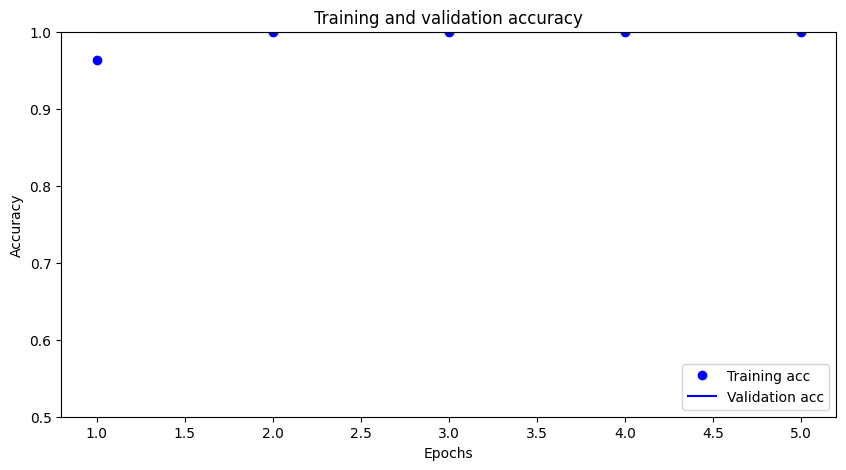

In [39]:
plt.figure(figsize=(8, 5))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5, 1))
plt.show()